<a href="https://colab.research.google.com/github/speddi24/Diabetis-Dataset/blob/master/Diabetis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Importing Libraries:

In [0]:
import numpy as np
import sklearn
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

####Identifying And Loading Dataset using Google Colab:
######Google Colab (short for Colaboratory) is a free platform from Google that allows users to code in Python. Colab is Google Suite version of a Jupyter Notebook. Benifits of Colab include easy installation of Python packages and sharing the document.''' We are using Colab so that it is easy to share the Python between the team, help each other and track the progress.'''

In [0]:
from google.colab import files
uploaded = files.upload()

Saving diabetic_dataset1 - Copy.csv to diabetic_dataset1 - Copy.csv


In [0]:
import pandas as pd 
df=pd.read_csv('/content/diabetic_dataset1 - Copy.csv')

#### Description of features:

######admission_type_id description 1 Emergency 2 Urgent 3 Elective 4 Newborn 5 Not Available 6 NULL 7 Trauma Center 8 Not Mapped

######discharge_disposition_id description 1 Discharged to home 2 Discharged/transferred to another short term hospital 3 Discharged/transferred to SNF 4 Discharged/transferred to ICF 5 Discharged/transferred to another type of inpatient care institution 6 Discharged/transferred to home with home health service 7 Left AMA 8 Discharged/transferred to home under care of Home IV provider 9 Admitted as an inpatient to this hospital 10 Neonate discharged to another hospital for neonatal aftercare 11 Expired 12 Still patient or expected to return for outpatient services 13 Hospice / home 14 Hospice / medical facility 15 Discharged/transferred within this institution to Medicare approved swing bed 16 Discharged/transferred/referred another institution for outpatient services 17 Discharged/transferred/referred to this institution for outpatient services 18 NULL 19 Expired at home. Medicaid only, hospice. 20 Expired in a medical facility. Medicaid only, hospice. 21 Expired, place unknown. Medicaid only, hospice. 22 Discharged/transferred to another rehab fac including rehab units of a hospital . 23 Discharged/transferred to a long term care hospital. 24 Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare. 25 Not Mapped 26 Unknown/Invalid 30 Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere 27 Discharged/transferred to a federal health care facility. 28 Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital 29 Discharged/transferred to a Critical Access Hospital (CAH).

######admission_source_id description 1 Physician Referral 2 Clinic Referral 3 HMO Referral 4 Transfer from a hospital 5 Transfer from a Skilled Nursing Facility (SNF) 6 Transfer from another health care facility 7 Emergency Room 8 Court/Law Enforcement 9 Not Available 10 Transfer from critial access hospital 11 Normal Delivery 12 Premature Delivery 13 Sick Baby 14 Extramural Birth 15 Not Available 17 NULL 18 Transfer From Another Home Health Agency 19 Readmission to Same Home Health Agency 20 Not Mapped 21 Unknown/Invalid 22 Transfer from hospital inpt/same fac reslt in a sep claim 23 Born inside this hospital 24 Born outside this hospital 25 Transfer from Ambulatory Surgery Center 26 Transfer from Hospice

###### Refer this link for description of all the features of Diabetis Dataset https://www.hindawi.com/journals/bmri/2014/781670/tab1/


####Exploratory Data analysis:
###### Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning.


In [0]:
# To display the top 5 rows
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [0]:
# To display the bottom 5 rows
df.tail(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [0]:
# to get the index of all the columns
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [0]:
# to print type of the data
print (type(df))

<class 'pandas.core.frame.DataFrame'>


In [0]:
# to print shape of the dataset
print("Diabetes data set dimensions : {}".format(df.shape))

Diabetes data set dimensions : (101766, 50)


In [0]:
# to print dimensions of datset
df.ndim

2

In [0]:
# Checking the data type
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [0]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: " , duplicate_rows_df.shape)
# Observation:No duplicate rows present in this dataset

number of duplicate rows:  (0, 50)


In [0]:
# for each column, describing the summary of statistics

for c in list(df.columns):
    
    # describing the values
    i = df[c].describe()
    print(i,'\n')

count    1.017660e+05
mean     1.652016e+08
std      1.026403e+08
min      1.252200e+04
25%      8.496119e+07
50%      1.523890e+08
75%      2.302709e+08
max      4.438672e+08
Name: encounter_id, dtype: float64 

count    1.017660e+05
mean     5.433040e+07
std      3.869636e+07
min      1.350000e+02
25%      2.341322e+07
50%      4.550514e+07
75%      8.754595e+07
max      1.895026e+08
Name: patient_nbr, dtype: float64 

count        101766
unique            6
top       Caucasian
freq          76099
Name: race, dtype: object 

count     101766
unique         3
top       Female
freq       54708
Name: gender, dtype: object 

count      101766
unique         10
top       [70-80)
freq        26068
Name: age, dtype: object 

count     101766
unique        10
top            ?
freq       98569
Name: weight, dtype: object 

count    101766.000000
mean          2.024006
std           1.445403
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        

In [0]:
# Stats for only columns of type ,int
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


###### Checking values on possible predictive  variables using
1. Pandas series:value_counts() function
2. Pandas groupby aggegate function

In [0]:
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [0]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

Text(0, 0.5, 'count')

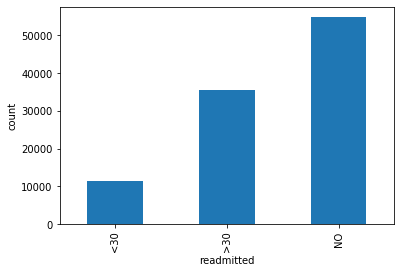

In [0]:
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('count')

In [0]:
df.groupby('age').size()

age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
dtype: int64

Text(0, 0.5, 'Count')

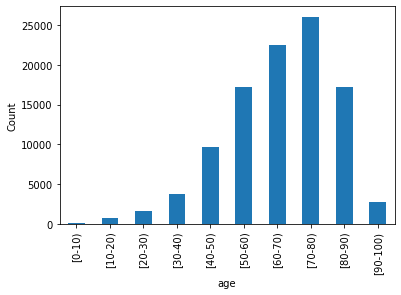

In [0]:
df.groupby('age').size().plot(kind='bar')   # Group by age visualisation
plt.ylabel('Count')

In [0]:
df.groupby('weight').size()

weight
>200             3
?            98569
[0-25)          48
[100-125)      625
[125-150)      145
[150-175)       35
[175-200)       11
[25-50)         97
[50-75)        897
[75-100)      1336
dtype: int64

Text(0, 0.5, 'Count')

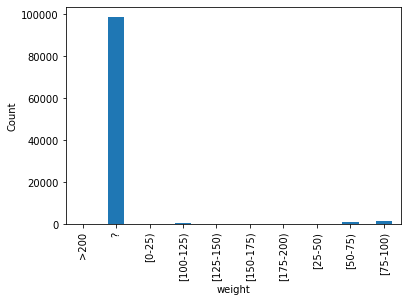

In [0]:
df.groupby('weight').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
df.groupby('race').size()

race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
dtype: int64

Text(0, 0.5, 'Count')

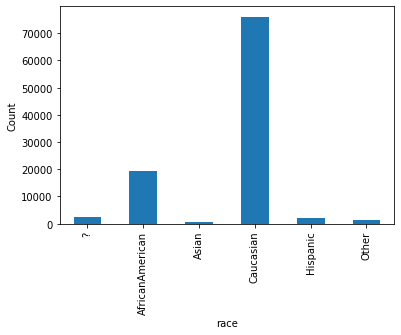

In [0]:
df.groupby('race').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
df.groupby('gender').size()

gender
Female             54708
Male               47055
Unknown/Invalid        3
dtype: int64

Text(0, 0.5, 'Count')

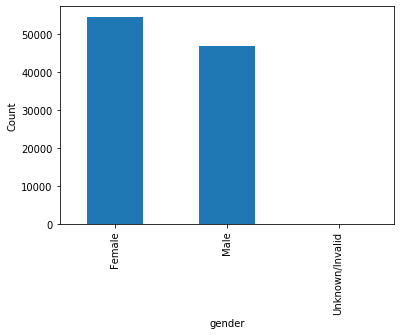

In [0]:
df.groupby('gender').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
df.groupby('payer_code').size()

payer_code
?     40256
BC     4655
CH      146
CM     1937
CP     2533
DM      549
FR        1
HM     6274
MC    32439
MD     3532
MP       79
OG     1033
OT       95
PO      592
SI       55
SP     5007
UN     2448
WC      135
dtype: int64

Text(0, 0.5, 'Count')

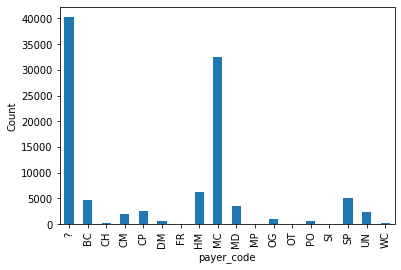

In [0]:
df.groupby('payer_code').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
df.groupby('medical_specialty').size().head(5)

medical_specialty
?                           49949
AllergyandImmunology            7
Anesthesiology                 12
Anesthesiology-Pediatric       19
Cardiology                   5352
dtype: int64

Text(0, 0.5, 'Count')

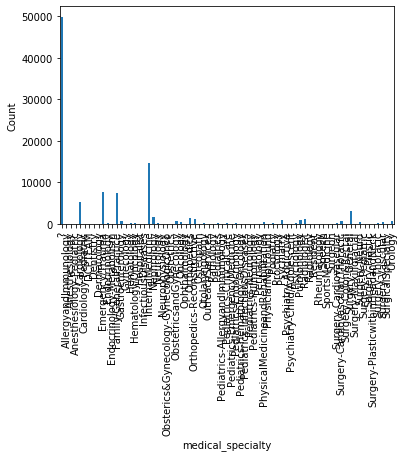

In [0]:
df.groupby('medical_specialty').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
df.groupby('diag_1').size().head(5)

diag_1
10      1
11     10
110     2
112    73
114     1
dtype: int64

In [0]:
df.groupby('diag_2').size().head(5)

diag_2
11       3
110      8
111      1
112    201
114      1
dtype: int64

In [0]:
df.groupby('diag_3').size().head(5)

diag_3
11       2
110     20
111      1
112    206
115      1
dtype: int64

In [0]:
df['insulin'].value_counts()

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

Text(0, 0.5, 'Count')

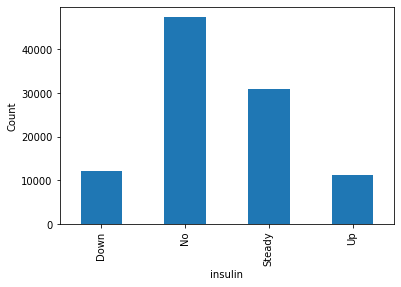

In [0]:
df.groupby('insulin').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
df['diabetesMed'].value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

Text(0, 0.5, 'Count')

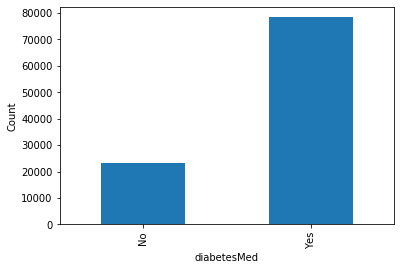

In [0]:
df.groupby('diabetesMed').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
df['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

Text(0, 0.5, 'Count')

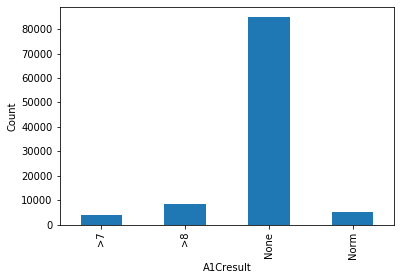

In [0]:
df.groupby('A1Cresult').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
df['metformin-pioglitazone' ].value_counts()

No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64

Text(0, 0.5, 'Count')

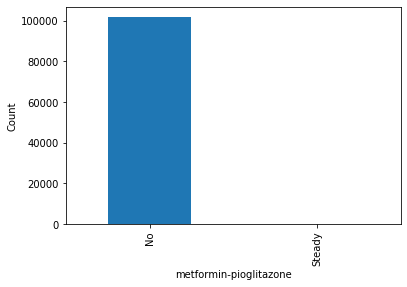

In [0]:
df.groupby('metformin-pioglitazone').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
df['metformin-rosiglitazone'].value_counts()

No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64

Text(0, 0.5, 'Count')

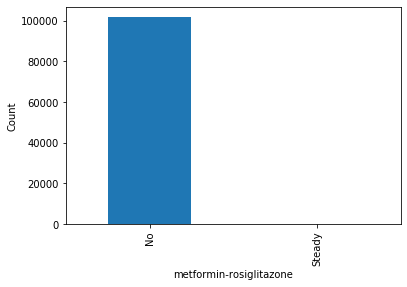

In [0]:
df.groupby('metformin-rosiglitazone').size().plot(kind='bar')
plt.ylabel('Count')

####Data Cleaning and Preparation (Feature Engineering)

In [0]:
# to check if there are any missing values
df.isnull().sum()
#dataframe.isna().sum(), can also be used to check missing values

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [0]:
# The below code can be used to drop if there are any missing values
# Dropping the missing values.
df_MV = df.dropna() 
df_MV.count()

# Observation: Our dataset donot have any missing values

encounter_id                101766
patient_nbr                 101766
race                        101766
gender                      101766
age                         101766
weight                      101766
admission_type_id           101766
discharge_disposition_id    101766
admission_source_id         101766
time_in_hospital            101766
payer_code                  101766
medical_specialty           101766
num_lab_procedures          101766
num_procedures              101766
num_medications             101766
number_outpatient           101766
number_emergency            101766
number_inpatient            101766
diag_1                      101766
diag_2                      101766
diag_3                      101766
number_diagnoses            101766
max_glu_serum               101766
A1Cresult                   101766
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride         

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb075955c0>,
      dtype=object)

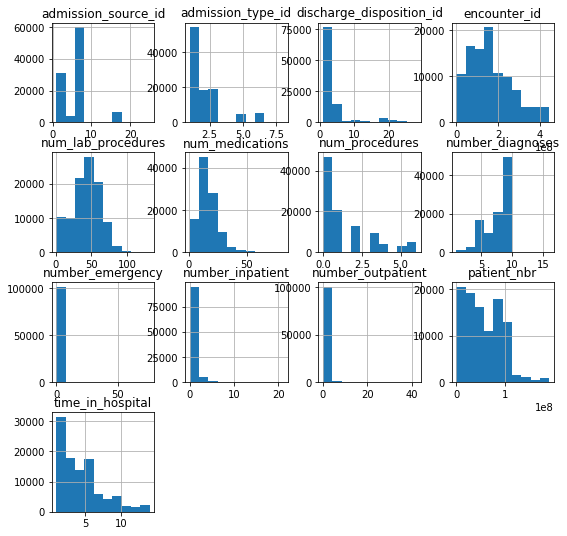

In [0]:
# Histograms of all numerical features
df.hist(figsize=(9, 9))

#### Removing irrelevant features
###### features that can be considered for removal during fine tuning :'discharge_disposition_id', 'admission_source_id', 'admission_type_id'. Yet to work on it

In [0]:
df1=df.drop(['encounter_id','weight', 'patient_nbr', 'payer_code'], axis=1)

In [0]:
#checking the dataset to determine if there are other columns that needs to be removed
df1.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [0]:
df1.shape

(101766, 46)

In [0]:
#Getting count for "?" in couple features
print("Total : ", df1[df1.medical_specialty == '?'].shape)
print("Total : ", df1[df1.race == '?'].shape)
print("Total : ", df1[df1.diag_1== '?'].shape)
print("Total : ", df1[df1.diag_2 == '?'].shape)
print("Total : ", df1[df1.diag_3 == '?'].shape)

Total :  (49949, 46)
Total :  (2273, 46)
Total :  (21, 46)
Total :  (358, 46)
Total :  (1423, 46)


In [0]:
# replacing "?" from the features with " Unknown"
df1.medical_specialty=df1.medical_specialty.str.replace('?','Unknown')

In [0]:
#df.groupby('medical_specialty').size()
print("Total : ", df1[df1.medical_specialty == '?'].shape)

Total :  (0, 46)


In [0]:
df1.race=df1.race.str.replace('?','Unknown')
print("Total : ", df1[df1.race == '?'].shape)

df1.diag_1=df1.diag_1.str.replace('?','Unknown')
print("Total : ", df1[df1.diag_1 == '?'].shape)

df1.diag_2=df1.diag_2.str.replace('?','Unknown')
print("Total : ", df1[df1.diag_2 == '?'].shape)

df1.diag_3=df1.diag_3.str.replace('?','Unknown')
print("Total : ", df1[df1.diag_3 == '?'].shape)

Total :  (0, 46)
Total :  (0, 46)
Total :  (0, 46)
Total :  (0, 46)


In [0]:
#Checking on the Medial Speciality column for missing data or unique

print('Number medical specialty:', df1.medical_specialty.nunique())
df1.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 73


medical_specialty
Unknown                             49949
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
                                    ...  
Psychiatry-Addictive                    1
Dermatology                             1
Speech                                  1
SportsMedicine                          1
Surgery-PlasticwithinHeadandNeck        1
Length: 73, dtype: int64

In [0]:
# There are many columns with data that are too small to be meaningful on their own.  They will be consolidated 
#into a category called Other_Specialities . Medical specialities be consolidated to  10  categories named "Top 10"

top_10 = ['Unknown','InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive']

# make a new column with duplicated data
df1['med_spec'] = df1['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
df1.loc[~df1.med_spec.isin(top_10),'med_spec'] = 'Other-Speciality'

In [0]:
#Top ten Specialities sorted in ascending order
df1.groupby('med_spec').size().sort_values(ascending = False)

med_spec
Unknown                       49949
InternalMedicine              14635
Other-Speciality               9480
Emergency/Trauma               7565
Family/GeneralPractice         7440
Cardiology                     5352
Surgery-General                3099
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
dtype: int64

###### Checking a few mediations which would compare fairly with insulin and would be be viable for the final dataset.


Text(0, 0.5, 'Count')

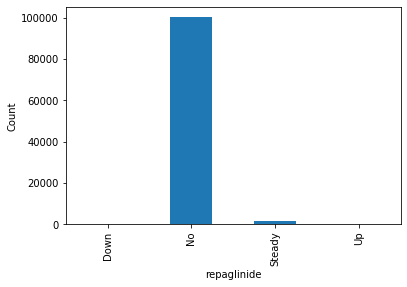

In [0]:
df1.groupby('repaglinide').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

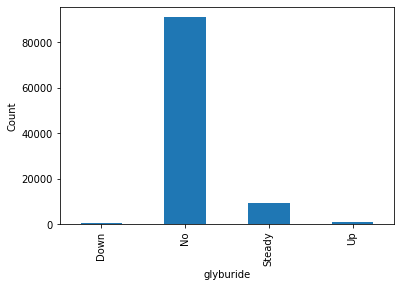

In [0]:
df1.groupby( 'glyburide').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

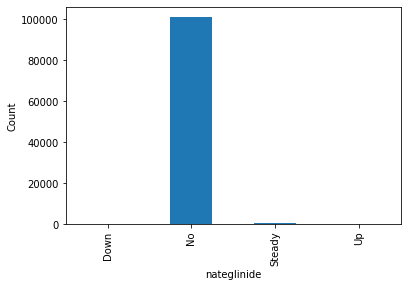

In [0]:
df1.groupby('nateglinide').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

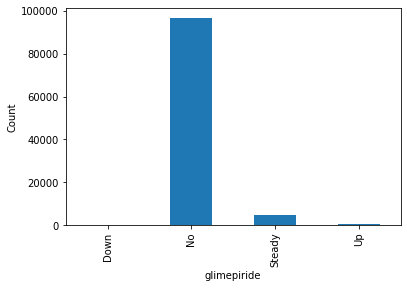

In [0]:
df1.groupby('glimepiride').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

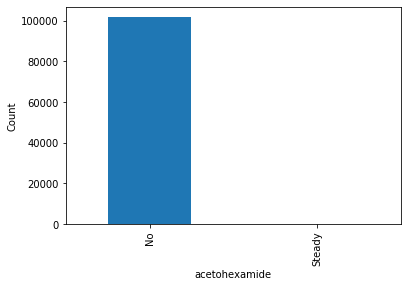

In [0]:
df1.groupby('acetohexamide').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

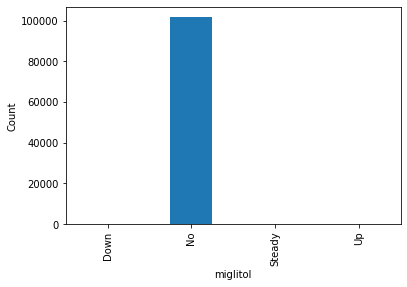

In [0]:
df1.groupby('miglitol').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

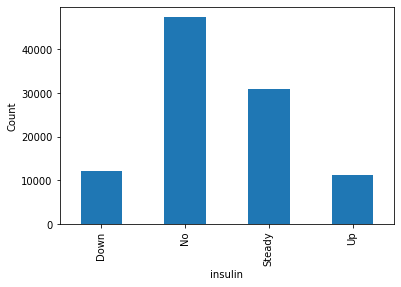

In [0]:
df1.groupby('insulin').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
#Dropping prescriptions except insulin: Not much important information is avaialbe in the below features

df1.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)

In [0]:
df1.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,med_spec
0,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,Unknown,Unknown,1,None,None,No,No,No,NO,Other-Speciality
1,Caucasian,Female,[10-20),1,1,7,3,Unknown,59,0,18,0,0,0,276,250.01,255,9,None,None,Up,Ch,Yes,>30,Unknown
2,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,Yes,NO,Unknown
3,Caucasian,Male,[30-40),1,1,7,2,Unknown,44,1,16,0,0,0,8,250.43,403,7,None,None,Up,Ch,Yes,NO,Unknown
4,Caucasian,Male,[40-50),1,1,7,1,Unknown,51,0,8,0,0,0,197,157,250,5,None,None,Steady,Ch,Yes,NO,Unknown


In [0]:
df1.shape

(101766, 25)

In [0]:
#converting 'up','down' and 'study' values to 'yes' 

df1['insulin'] = pd.Series(['NO' if val == 'No' else 'YES' for val in df1['insulin']])


In [0]:
df1.groupby('insulin').size()

insulin
NO     47383
YES    54383
dtype: int64

Text(0, 0.5, 'Count')

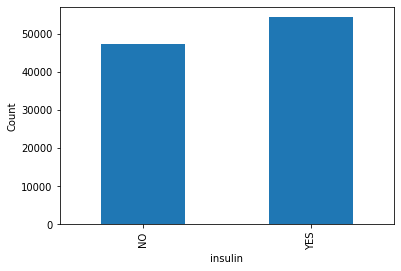

In [0]:
df1.groupby('insulin').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
# removing medical specialty as all the sorted information is available in feature med_spec
df2=df1.drop(['medical_specialty'],axis=1)

In [0]:
df2.head(5)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,med_spec
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,Unknown,Unknown,1,None,None,NO,No,No,NO,Other-Speciality
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,YES,Ch,Yes,>30,Unknown
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,NO,No,Yes,NO,Unknown
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,YES,Ch,Yes,NO,Unknown
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,YES,Ch,Yes,NO,Unknown


In [0]:
## Looking at the unique values

# for each column
for c in list(df2.columns):
    
    # get a list of unique values
    n = df2[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<20:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

race
['Caucasian' 'AfricanAmerican' 'Unknown' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id: 26 unique values
admission_source_id
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
num_lab_procedures: 118 unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 39 unique values
number_emergency: 33 unique values
number_inpatient: 21 unique values
diag_1: 717 unique values
diag_2: 749 unique values
diag_3: 790 unique values
number_diagnoses
[ 1  9  6  7  5  8  3  4  2 16 12 13 15 10 11 14]
max_glu_serum
['None' '>300' 'Norm' '>200']
A1Cresult
['None' '>7' '>8' 'Norm']
insulin
['NO' 'YES']
change
['No' 'Ch']
diabetesMed
['No' 'Yes']
readmitted
['NO' '>30' '<30']
med_spec
['Other-Speciality' 'Unkn

In [0]:
#Changing categorical to numeric (manual Onehot encoding)
# '0' means not readmitted
# '1' means readmitted 
df2['readmitted'] = pd.Series([0 if val == 'NO' else 1 for val in df2['readmitted']])

Text(0, 0.5, 'Count')

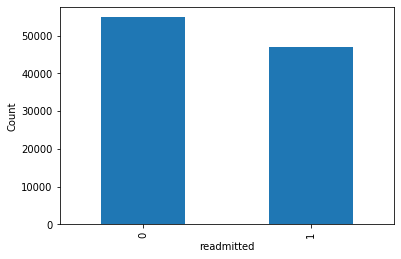

In [0]:
df2.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [0]:
df2['readmitted'].value_counts()

0    54864
1    46902
Name: readmitted, dtype: int64

In [0]:
df2.head(5)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,med_spec
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,Unknown,Unknown,1,None,None,NO,No,No,0,Other-Speciality
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,YES,Ch,Yes,1,Unknown
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,NO,No,Yes,0,Unknown
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,YES,Ch,Yes,0,Unknown
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,YES,Ch,Yes,0,Unknown


In [0]:
# creating a copyof df2 dataset for cross validation , for later use
df2_CV=df2

#### Feature Standardization

In [0]:
# checking the data types before standarizing the features
df2.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
insulin                     object
change                      object
diabetesMed                 object
readmitted                   int64
med_spec                    object
dtype: object

In [0]:
# Using one-hot-encoding on categorical features
# converting  nominal values to dummy values
df2_age = pd.get_dummies(df2['age'])
df2_race = pd.get_dummies(df2['race'])
df2_gender = pd.get_dummies(df2['gender'])
df2_max_glu_serum = pd.get_dummies(df2['max_glu_serum'])
df2_A1Cresult = pd.get_dummies(df2['A1Cresult'])
df2_insulin = pd.get_dummies(df2['insulin'])
df2_change = pd.get_dummies(df2['change'])
df2_diabetesMed = pd.get_dummies(df2['diabetesMed'])
df2_med_spec = pd.get_dummies(df2['med_spec'])
df2_diag_1 = pd.get_dummies(df2['diag_1'])
df2_diag_2 = pd.get_dummies(df2['diag_2'])
df2_diag_3 = pd.get_dummies(df2['diag_3'])

In [0]:
pd.get_dummies(df['age']) .head()

,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [0]:
diab = pd.concat([df2, df2_age, df2_race, df2_gender, df2_max_glu_serum, df2_A1Cresult, 
                  df2_insulin, df2_change, df2_diabetesMed,df2_med_spec,df2_diag_2,df2_diag_2,df2_diag_3], axis=1)


In [0]:
diab.shape

(101766, 2355)

In [0]:
diab.drop(['age','race','gender','max_glu_serum', 'A1Cresult', 'insulin', 'change', 
                  'diabetesMed','med_spec','diag_1','diag_2','diag_3'], axis=1, inplace=True)

In [0]:
diab.shape

(101766, 2343)

In [0]:
diab.head(2)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),AfricanAmerican,Asian,Caucasian,Hispanic,Other,Unknown,Female,Male,Unknown/Invalid,>200,>300,None,Norm,>7,>8,None,Norm,NO,...,V03,V06,V07,V08,V09,V10,V11,V12,V13,V14,V15,V16,V17,V18,V22,V23,V25,V27,V42,V43,V44,V45,V46,V49,V53,V54,V55,V57,V58,V60,V61,V62,V63,V64,V65,V66,V70,V72,V85,V86
0,6,25,1,1,41,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,7,3,59,0,18,0,0,0,9,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# standarizing numerical variables 
## Observation: Have to check again as all the features with '0' and '1' values also have been standardized. verify if it is right way to preprocess or not
## To Do: have to remove the target variable before standardizing i.e., have to fit the scalar on X_train and _test and not on y. Have to redo this part

from sklearn import preprocessing
# Get column names first
names_diab = diab.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_diab = scaler.fit_transform(diab)
scaled_diab = pd.DataFrame(scaled_diab, columns=names_diab)


In [0]:
print(scaled_diab.head(5))

   admission_type_id  discharge_disposition_id  ...       V85      V86
0           2.750800                  4.031022  ... -0.030728 -0.00543
1          -0.708461                 -0.514312  ... -0.030728 -0.00543
2          -0.708461                 -0.514312  ... -0.030728 -0.00543
3          -0.708461                 -0.514312  ... -0.030728 -0.00543
4          -0.708461                 -0.514312  ... -0.030728 -0.00543

[5 rows x 2343 columns]


In [0]:
scaled_diab.dtypes

admission_type_id           float64
discharge_disposition_id    float64
admission_source_id         float64
time_in_hospital            float64
num_lab_procedures          float64
                             ...   
V66                         float64
V70                         float64
V72                         float64
V85                         float64
V86                         float64
Length: 2343, dtype: object

In [0]:

print(scaled_diab.readmitted)

0        -0.924596
1         1.081554
2        -0.924596
3        -0.924596
4        -0.924596
            ...   
101761    1.081554
101762   -0.924596
101763   -0.924596
101764   -0.924596
101765   -0.924596
Name: readmitted, Length: 101766, dtype: float64


 ###### Note:  We will not be using the scaled_diab for our project as we understand that not all the features in this dataset are important for the prediction logically and might not give an accurate result.

#### Determining Outliers and Building a model from the dataset  obtained 

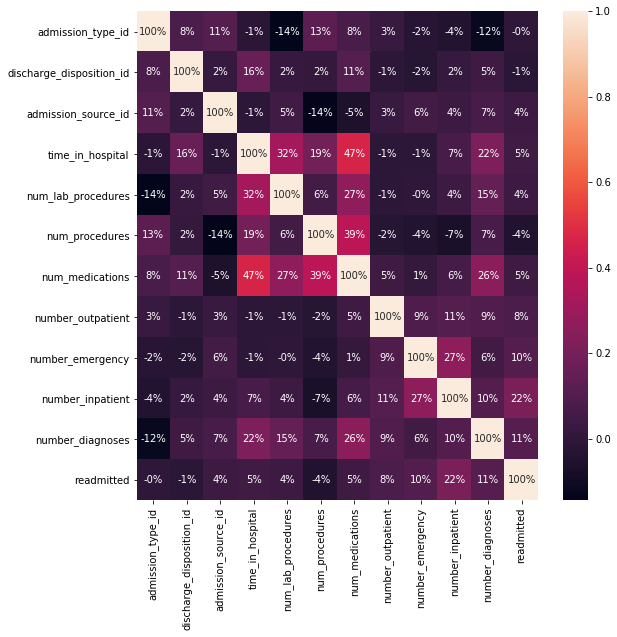

In [0]:
#Creating a heatmap to check co-realtion of variables to determine those to remove from dataset
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap (df2.iloc[:,:].corr(), annot = True, fmt='.0%')

In [0]:
#import seaborn as sns
#plt.figure(figsize=(9,9))
#sns.heatmap (scaled_df.iloc[:,:].corr(), annot = True, fmt='.0%')

In [0]:
df2_std=df2[[ 'time_in_hospital', 'num_lab_procedures', 'num_procedures','num_medications' ]]

In [0]:
from sklearn import preprocessing
# Get column names first
names = df2_std.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df2_std)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [0]:
scaled_df.head

<bound method NDFrame.head of         time_in_hospital  num_lab_procedures  num_procedures  num_medications
0              -1.137649           -0.106517       -0.785398        -1.848268
1              -0.467653            0.808384       -0.785398         0.243390
2              -0.802651           -1.631351        2.145781        -0.371804
3              -0.802651            0.045967       -0.199162        -0.002688
4              -1.137649            0.401761       -0.785398        -0.986997
...                  ...                 ...             ...              ...
101761         -0.467653            0.401761       -0.785398        -0.002688
101762          0.202343           -0.513139        0.973309         0.243390
101763         -1.137649            0.503417       -0.785398        -0.863958
101764          1.877333            0.096794        0.387074         0.612506
101765          0.537341           -1.529696        0.973309        -1.602190

[101766 rows x 4 columns]>

In [0]:
##creating dataset with target and high corelation variables:
df_diab = pd.concat([ scaled_df,df2.readmitted], axis=1)

#df_diab= df2[[ 'time_in_hospital', 'num_lab_procedures', 'num_procedures','num_medications', 'readmitted' ]]

In [0]:
df_diab.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,readmitted
0,-1.137649,-0.106517,-0.785398,-1.848268,0
1,-0.467653,0.808384,-0.785398,0.243390,1
2,-0.802651,-1.631351,2.145781,-0.371804,0
3,-0.802651,0.045967,-0.199162,-0.002688,0
4,-1.137649,0.401761,-0.785398,-0.986997,0


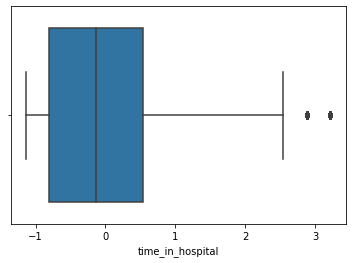

In [0]:
# detecting outliers
sns.boxplot(x=df_diab["time_in_hospital"])


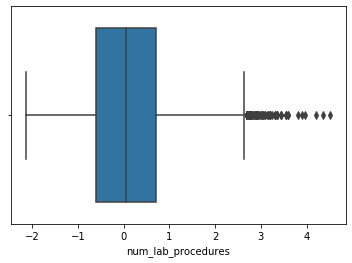

In [0]:
sns.boxplot(x=df_diab["num_lab_procedures"])


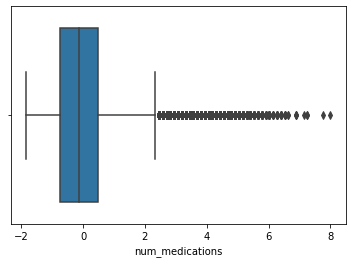

In [0]:
sns.boxplot(df_diab["num_medications"])


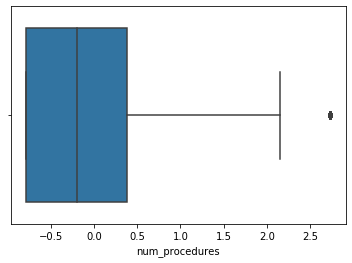

In [0]:
sns.boxplot(x=df_diab["num_procedures"])

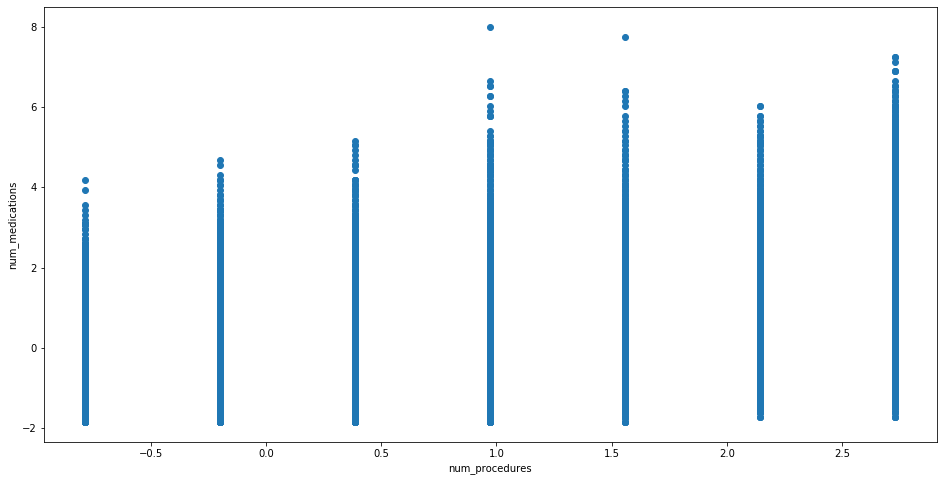

In [0]:
# checking for outliers using scatter plot

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_diab["num_procedures"], df_diab["num_medications"])
ax.set_xlabel('num_procedures')
ax.set_ylabel('num_medications')
plt.show()

In [0]:
# determining outliers using Z scores where mean is  '0' and Standard deviation is '1'

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_diab))
print(z)

[[1.13764856 0.10651686 0.78539774 1.84826769 0.92459587]
 [0.46765271 0.80838387 0.78539774 0.24338965 1.08155361]
 [0.80265063 1.63135141 2.14578066 0.37180369 0.92459587]
 ...
 [1.13764856 0.50341696 0.78539774 0.86395835 0.92459587]
 [1.87733278 0.09679441 0.38707362 0.61250565 0.92459587]
 [0.53734107 1.52969578 0.9733093  1.60219036 0.92459587]]


In [0]:
# defining threshold as 3 to identify any outliers above 3
threshold = 3
print(np.where(z > 3))

(array([    73,    114,    151, ..., 101748, 101751, 101755]), array([0, 0, 0, ..., 0, 3, 0]))


In [0]:
# number in the first array is the row # and second arrayis corresponding column #

print(z[73][0])

3.217324486542054


In [0]:
# dataset after removing all outliers above threshold 3

df_diab_outlier= df_diab[(z < 3).all(axis=1)]

In [0]:
df_diab.shape

(101766, 5)

In [0]:
# this step shows that there are 2344 outliers 
df_diab_outlier.shape

(99422, 5)

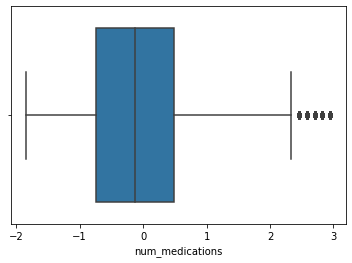

In [0]:
sns.boxplot(df_diab_outlier["num_medications"])

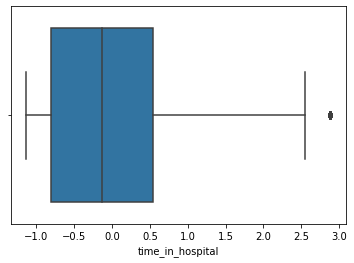

In [0]:
sns.boxplot(x=df_diab_outlier["time_in_hospital"])

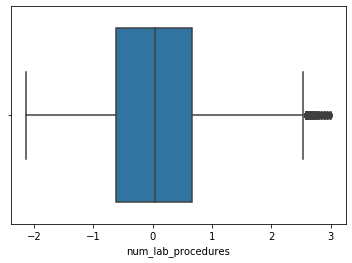

In [0]:
sns.boxplot(x=df_diab_outlier["num_lab_procedures"])

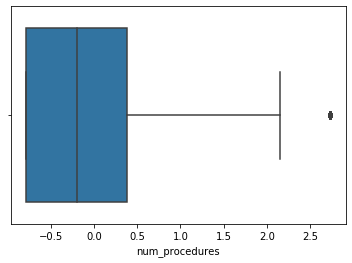

In [0]:
sns.boxplot(x=df_diab_outlier["num_procedures"])

In [0]:
# The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

#In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

#It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers

Q1 = df_diab.quantile(0.25)
Q3 = df_diab.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

time_in_hospital      1.339992
num_lab_procedures    1.321523
num_procedures        1.172471
num_medications       1.230387
readmitted            1.000000
dtype: float64


In [0]:
print ((df_diab < (Q1 - 1.5 * IQR)) |(df_diab > (Q3 + 1.5 * IQR)))

        time_in_hospital  num_lab_procedures  ...  num_medications  readmitted
0                  False               False  ...            False       False
1                  False               False  ...            False       False
2                  False               False  ...            False       False
3                  False               False  ...            False       False
4                  False               False  ...            False       False
...                  ...                 ...  ...              ...         ...
101761             False               False  ...            False       False
101762             False               False  ...            False       False
101763             False               False  ...            False       False
101764             False               False  ...            False       False
101765             False               False  ...            False       False

[101766 rows x 5 columns]


In [0]:
# creating dataset without outliers using IQR method

df_diab_out = df_diab[~((df_diab < (Q1 - 1.5 * IQR)) |(df_diab > (Q3 + 1.5 * IQR))).any(axis=1)]
df_diab_out.shape

(93326, 5)

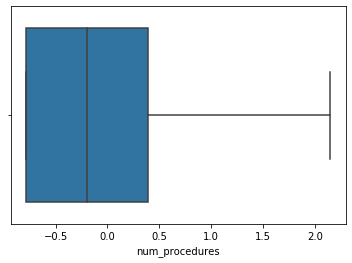

In [0]:
sns.boxplot(x=df_diab_out["num_procedures"])

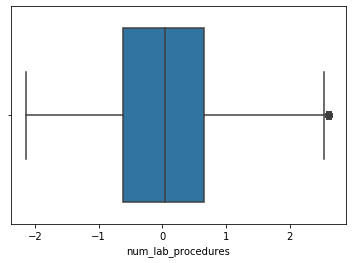

In [0]:
sns.boxplot(x=df_diab_out["num_lab_procedures"])

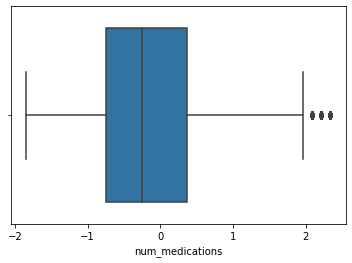

In [0]:
sns.boxplot(df_diab_out["num_medications"])

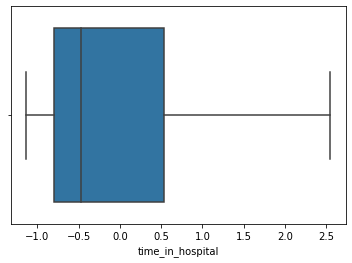

In [0]:
sns.boxplot(x=df_diab_out["time_in_hospital"])

In [0]:
df_diab_out.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'readmitted'],
      dtype='object')

###### Note: We will be using optimized dataset obtained after removing outliers by IQR method as it is robust against outliers.

## Model Fitting, Training & Testing

####Logistic Regression

In [0]:
#Spliting Data in Testing and Training

X = df_diab.drop(['readmitted'], axis=1)
y =  df_diab ['readmitted']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [0]:
X_train. shape


(81412, 4)

In [0]:
y_train. shape

(81412,)

In [0]:
#from sklearn import preprocessing
#std_scale = preprocessing.StandardScaler().fit(X_train)
#X_train = std_scale.transform(X_train)
#X_test = std_scale.transform(X_test)

In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, ..., 1, 0, 0])

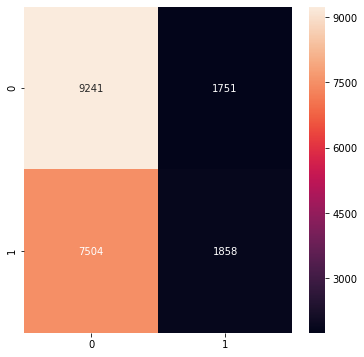

In [0]:
plt.figure(figsize=(6,6))
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

####KNN Classifier:

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.777
Accuracy on test set: 0.518


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20,p=50, leaf_size=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=50,
                     weights='uniform')

In [0]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.611
Accuracy on test set: 0.543


OBSERVATION: Improved performance was observed when the neighbors was set to 20 and leaf_size to 20. Though the training scores were reduced by 20%, overfitting is minimized.

In [0]:
# KNN classification using df_diab_out dataset

X = df_diab_out.drop(['readmitted'], axis=1)
y =  df_diab_out['readmitted']


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [0]:
X_train. shape

(74660, 4)

In [0]:
y_train. shape

(74660,)

In [0]:
X_test. shape

(18666, 4)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20,p=50, leaf_size=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=50,
                     weights='uniform')

In [0]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.609
Accuracy on test set: 0.544


In [0]:
# Hypertuning KNN classifier using Exhaustive GridSearchCV

from sklearn.model_selection import GridSearchCV

In [0]:
k_range = list(range(1,31))
grid_params = {'n_neighbors' : k_range, 'weights': ['uniform','distance'], 'metric': ['euclidean','manhattan'],'p':['50','2']}
gs=GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,n_jobs=-1,cv = 10, scoring = 'accuracy')
gs_results = gs.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 13.6min finished


In [0]:
gs_results.best_score_

0.5443209215108492

In [0]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=28, p='50',
                     weights='uniform')

In [0]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 28, 'p': '50', 'weights': 'uniform'}

In [0]:
# cross validation of the datset

from sklearn.model_selection import cross_val_score
import numpy as np#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.5195007  0.52175078 0.51240289 0.52381463 0.518967  ]
cv_scores mean:0.519287197594664


####Conclusion on KNN Classifier: All the results from Cross validation and hypertuning using GridSearchCV showed that the scores are about 52 to 60%. Indicating that the initial data has to undergo more through preprossing or more accuracy cannot be achieved from the existing data.

#### SVM Classifier:

In [0]:
# Hypertuning SVM
# gridsearchcv with all hyperparameters related to SVM classifier
# to do: have to run again as it took lot of time to process

%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['linear', 'rbf', 'poly'], 'C':[0.1, 0.5, 1, 5, 10]}

clf = GridSearchCV(SVC(), parameters)
clf.fit(X_train, y_train)
print('score',clf.score(X_test, y_test))
print(clf.best_params_)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in v

score 0.5611807564555877
{'C': 1, 'kernel': 'rbf'}
CPU times: user 1h 21min 31s, sys: 6.89 s, total: 1h 21min 38s
Wall time: 1h 21min 42s


###### Result: score 0.5611807564555877,                                                   {'C': 1, 'kernel': 'rbf'},                                                  CPU times: user 1h 21min 31s,                                               sys: 6.89 s, total: 1h 21min 38s,                                           Wall time: 1h 21min 42s

####Decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=100, random_state=42) 
tree.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [0]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.798
Accuracy on test set: 0.527


In [0]:
from sklearn.tree import export_graphviz
dot_data=export_graphviz(tree, out_file="tree.dot", class_names=["readmitted", "Not_readmitted"],
              feature_names=["time_in_hospital", "num_lab_procedures", "num_procedures","num_medications"],impurity=False, filled=True)

In [0]:
import graphviz
import pydotplus
with open("tree.dot") as f:
   dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [0]:
##To do: still have to work on resizing.

import pydotplus
pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"5,5!"')
pydot_graph.write_png('resized_tree.png')

True